In [45]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
url = "https://en.wikipedia.org/wiki/List_of_production_battery_electric_vehicles"

In [17]:
r = requests.get(url)
soup = bs(r.content)

In [ ]:
content = soup.prettify()
content

In [14]:
table = soup.find(class_="hatnote navigation-not-searchable")
print(table)

<div class="hatnote navigation-not-searchable" role="note">See also: <a href="/wiki/Category:Production_electric_cars" title="Category:Production electric cars">Category:Production electric cars</a></div>


In [23]:
df_0 = pd.read_html(url)[0]

In [30]:
from IPython.display import display
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df_0)

,Model,Calendar year produced,Body style,Manufacturer,Marque origin
0,Aspark OWL,2021,Coupé,Aspark,Japan
1,Audi e-tron,2018,Crossover SUV,Audi,Germany
2,Audi e-tron GT,2021,Sedan,Audi,Germany
3,Audi Q4 e-tron,2021,Crossover SUV,Audi,Germany
4,BMW i3,2013,Hatchback,BMW,Germany
5,BMW i4,2021,Liftback,BMW,Germany
6,BMW iX,2021,Crossover SUV,BMW,Germany
7,BMW iX3,2020,Crossover SUV,BMW,Germany
8,BrightDrop EV600,2022,Van,General Motors,United States
9,Cadillac Lyriq,2022,Crossover SUV,General Motors,United States


In [37]:
manufacturer = list(df_0["Manufacturer"])
type(manufacturer)
len(manufacturer)

list

In [40]:
company, score = np.unique(manufacturer, return_counts=True)

In [41]:
print(company)
print("========================")
print(score)

['Aspark' 'Audi' 'Automobili Pininfarina' 'BMW' 'Dacia/Renault'
 'Daimler AG' 'Ford' 'General Motors' 'Genesis Motor' 'Honda' 'Hyundai'
 'Jaguar Land Rover' 'Kia' 'Lotus Cars' 'Lucid Motors' 'Mazda' 'Mini/BMW'
 'Mitsubishi Motors' 'Nissan' 'Porsche' 'Renault' 'Rimac Automobili'
 'Rivian' 'SEAT' 'Stellantis' 'Subaru (produced by Toyota)'
 'Tata Motors Cars' 'Tesla, Inc.' 'Toyota'
 'Toyota (produced by Stellantis)' 'Volkswagen' 'Volvo Cars' 'Škoda Auto']
[ 1  3  1  4  1  8  2  5  3  1  4  1  5  1  1  1  1  1  3  1  4  1  2  1
 18  1  2  5  2  2  5  3  1]


In [44]:
cars = dict(zip(company, score))
cars

{'Aspark': 1,
 'Audi': 3,
 'Automobili Pininfarina': 1,
 'BMW': 4,
 'Dacia/Renault': 1,
 'Daimler AG': 8,
 'Ford': 2,
 'General Motors': 5,
 'Genesis Motor': 3,
 'Honda': 1,
 'Hyundai': 4,
 'Jaguar Land Rover': 1,
 'Kia': 5,
 'Lotus Cars': 1,
 'Lucid Motors': 1,
 'Mazda': 1,
 'Mini/BMW': 1,
 'Mitsubishi Motors': 1,
 'Nissan': 3,
 'Porsche': 1,
 'Renault': 4,
 'Rimac Automobili': 1,
 'Rivian': 2,
 'SEAT': 1,
 'Stellantis': 18,
 'Subaru (produced by Toyota)': 1,
 'Tata Motors Cars': 2,
 'Tesla, Inc.': 5,
 'Toyota': 2,
 'Toyota (produced by Stellantis)': 2,
 'Volkswagen': 5,
 'Volvo Cars': 3,
 'Škoda Auto': 1}

Text(0, 0.5, 'no. of car models in market')

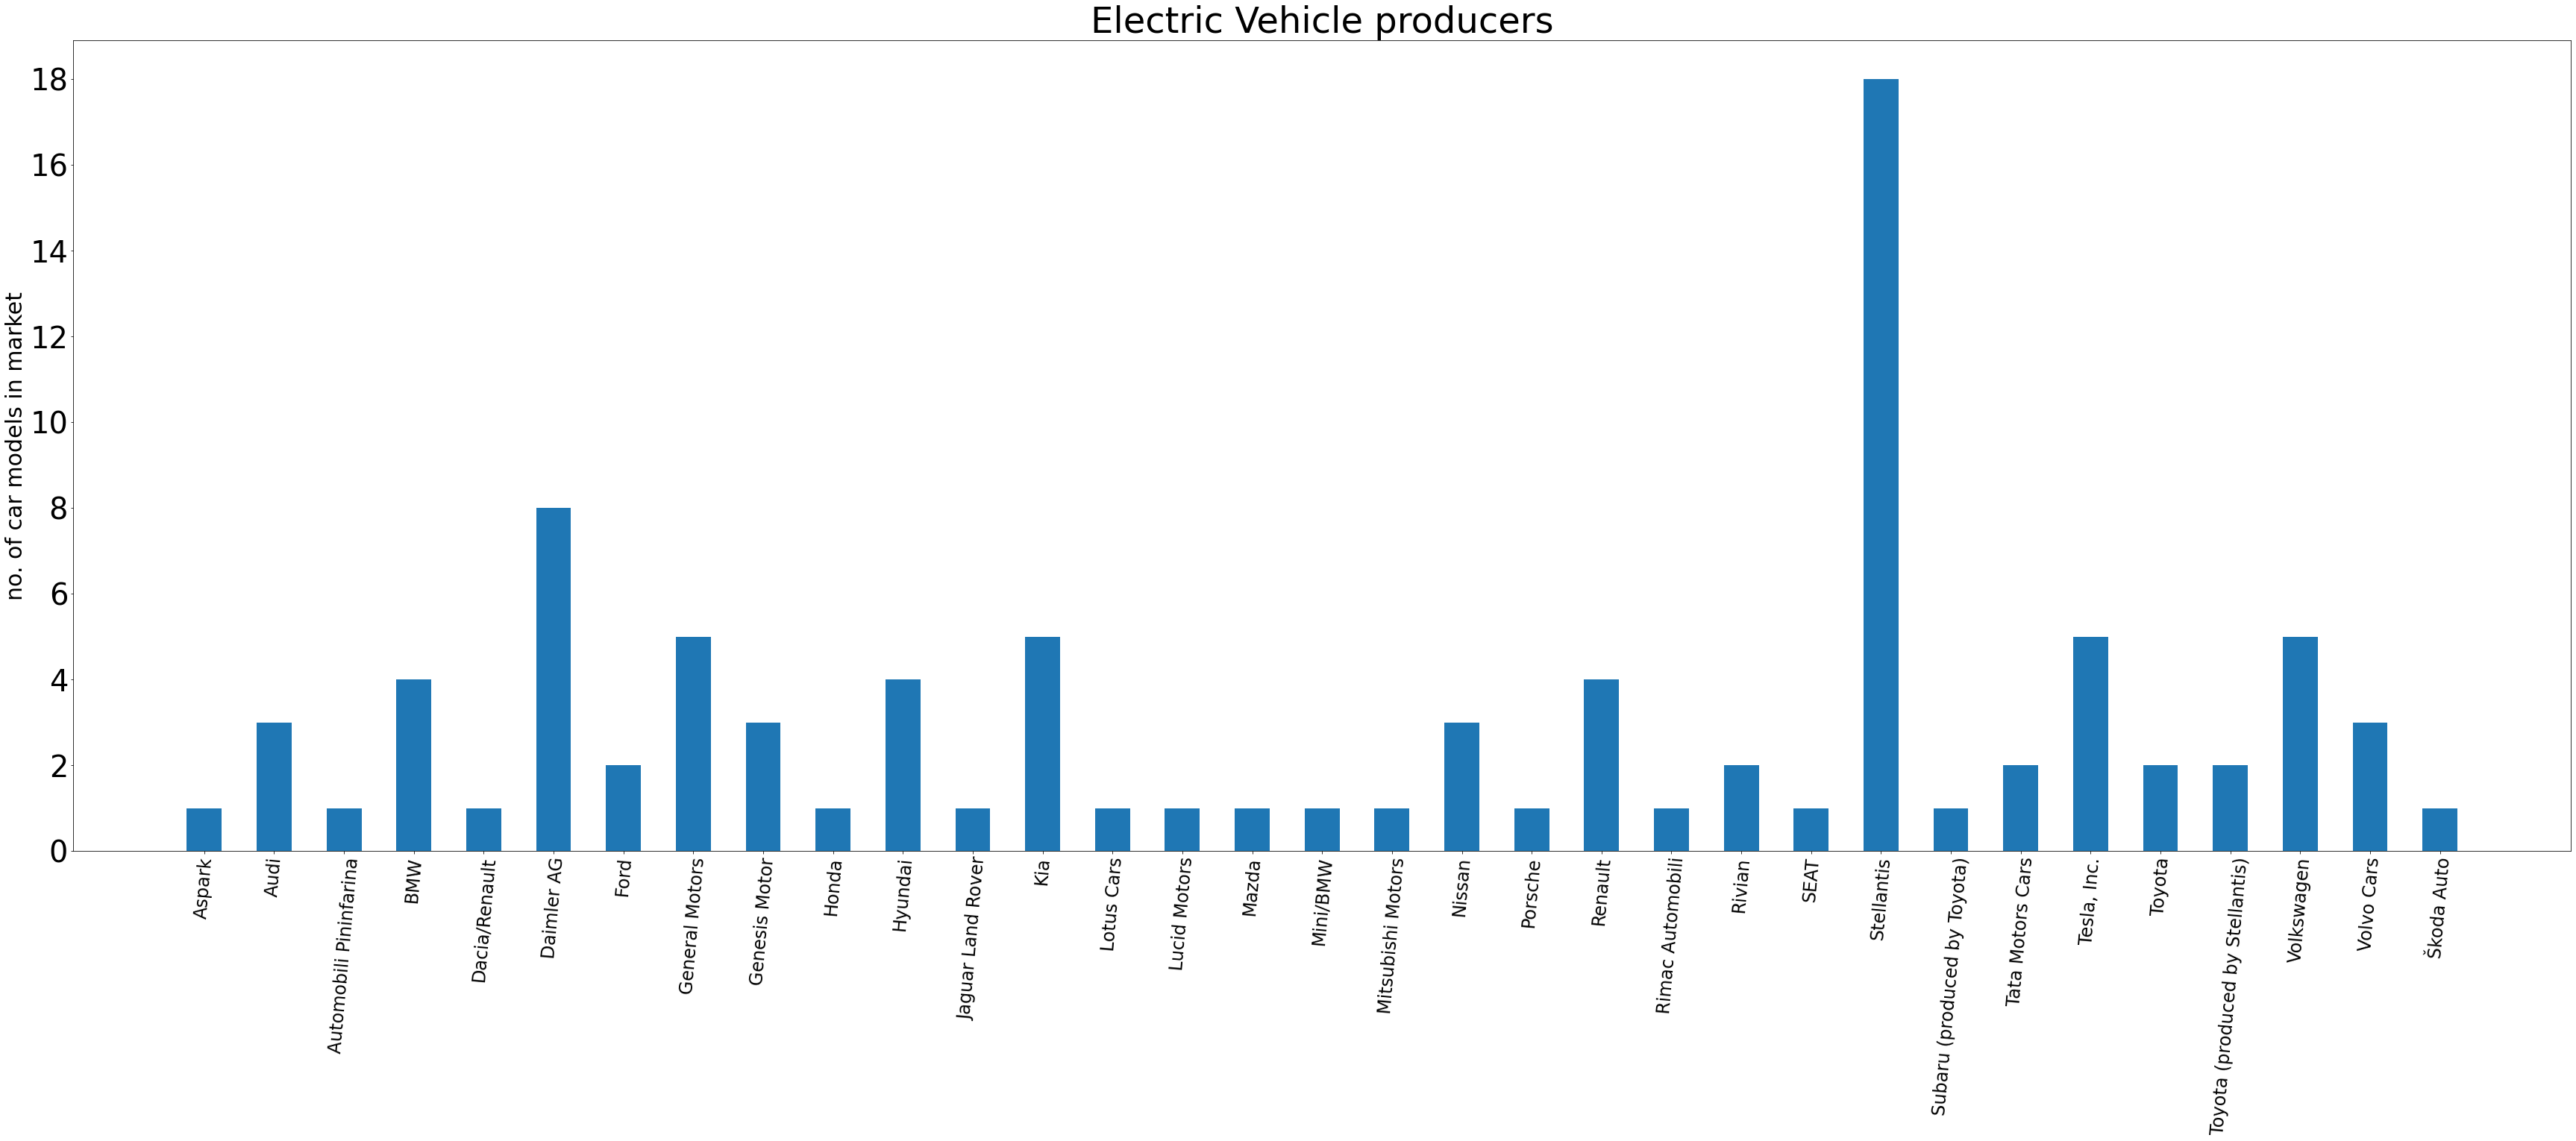

In [90]:
plt.bar(company, score, width=0.5)
plt.rcParams["figure.figsize"] = (60,20)
# plt.rcParams.update({"font.size":40})
plt.title("Electric Vehicle producers")
# plt.xlabel("Car companies", fontsize=24)
plt.xticks(rotation=85, fontsize=24)
plt.locator_params(axis="y", nbins=10)
plt.ylabel("no. of car models in market", fontsize=30)